In [1]:
import numpy as np
from scipy.fft import fft, fftfreq, ifft
from sourcesep.utils.compute import lowpass
from timebudget import timebudget

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(font_scale=0.8)
%config InlineBackend.figure_format='retina'

In [2]:
rng = np.random.default_rng()
sampling_interval = 0.02
t = np.arange(500) * sampling_interval

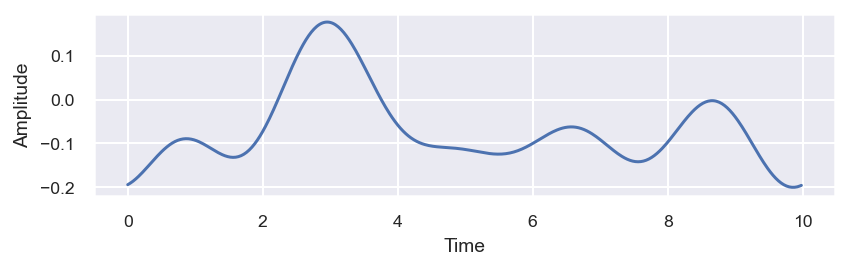

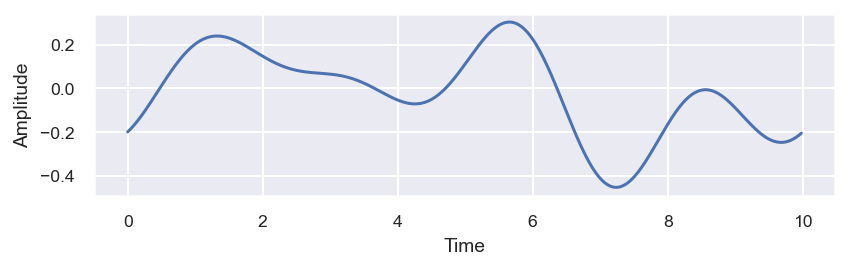

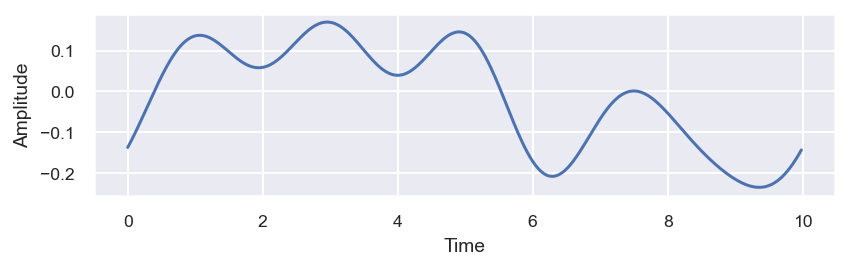

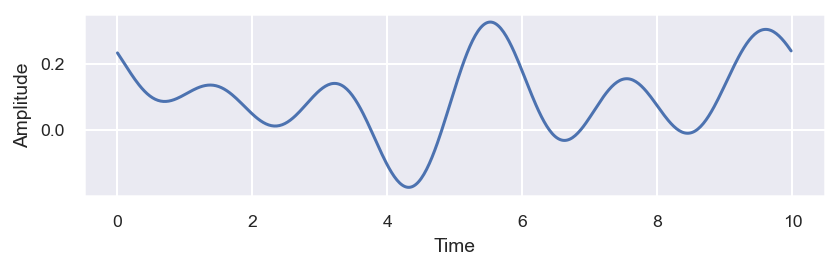

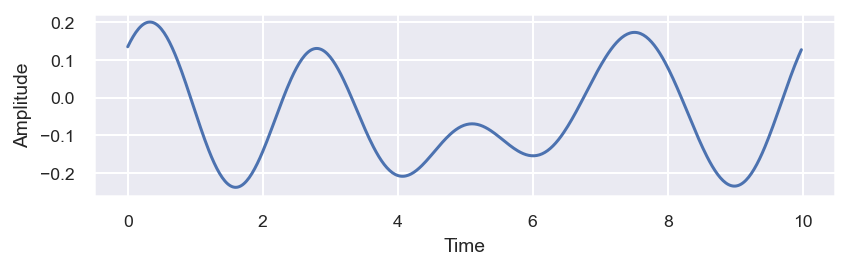

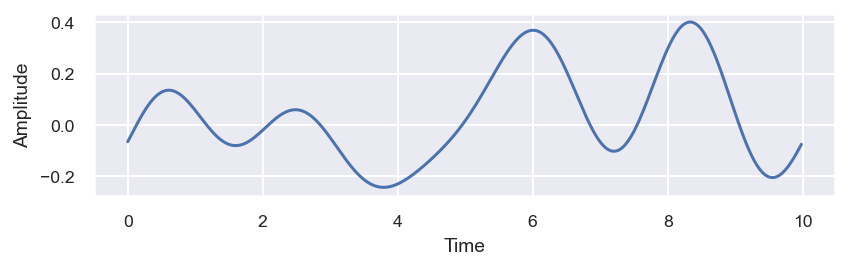

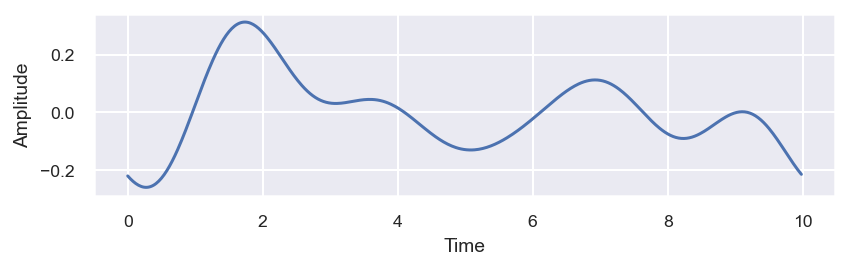

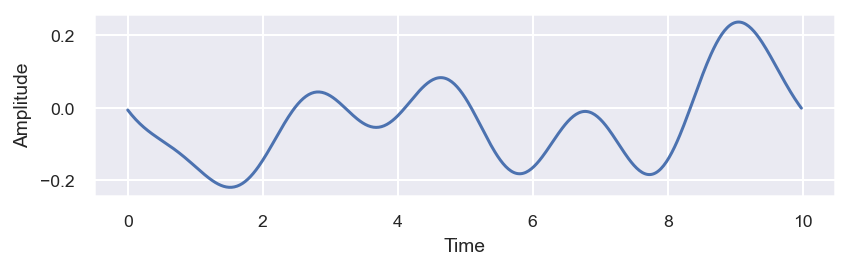

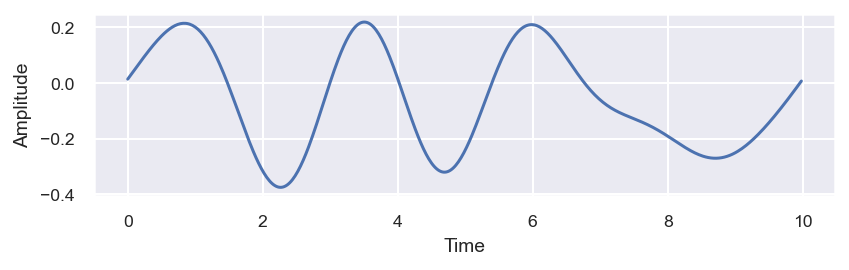

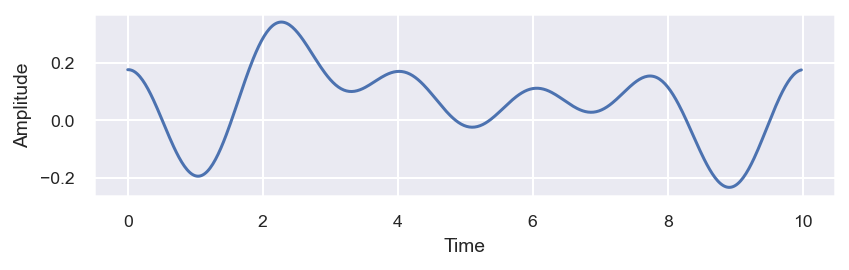

In [10]:
for i in range(10):
    xt = rng.standard_normal(size = (np.size(t),))# + 1*np.sin(2*np.pi*0.5*t)

    xt_filt = lowpass(xt=xt,
        sampling_interval=sampling_interval,
        pass_below=0.5)

    _, ax = plt.subplots(1,1,figsize=(6,2))
    ax.plot(t,xt_filt)
    ax.set(xlabel='Time', ylabel='Amplitude')
    plt.tight_layout()
    plt.show()

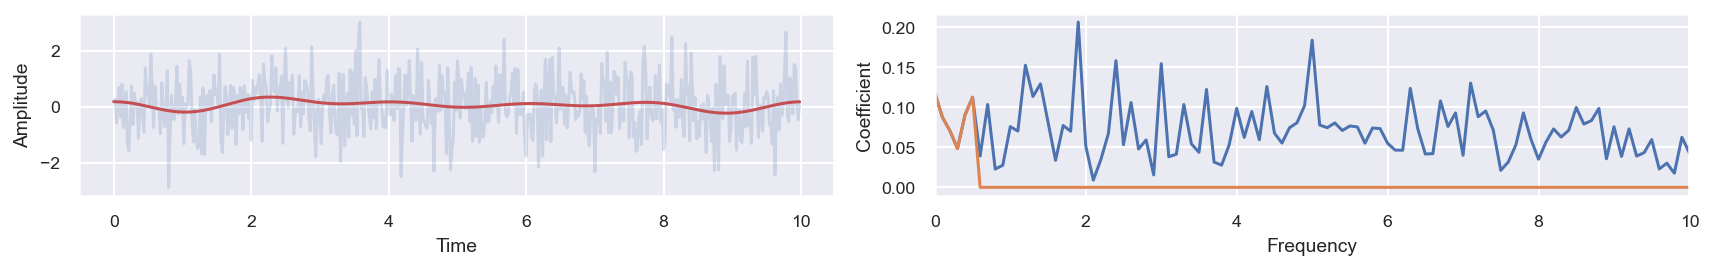

In [11]:
# calculate fft
xf = fft(xt)
xf_filt = fft(xt_filt)
f = fftfreq(xt.size, sampling_interval)[:(xt.size//2)]

_, ax = plt.subplots(1,2,figsize=(12,2))
ax[0].plot(t,xt, alpha=0.2)
ax[0].plot(t,xt_filt, color='r')
ax[0].set(xlabel='Time', ylabel='Amplitude')

ax[1].plot(f, (2.0/xt.size) * np.abs(xf[0:(xt.size//2)]))
ax[1].plot(f, (2.0/xt.size) * np.abs(xf_filt[0:(xt.size//2)]))
ax[1].set(xlabel='Frequency', ylabel='Coefficient', xlim=(0,10))
plt.tight_layout()
plt.show()

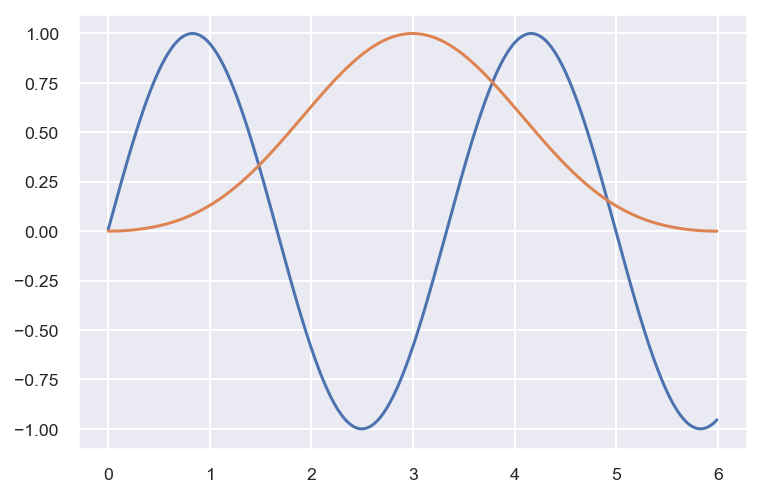

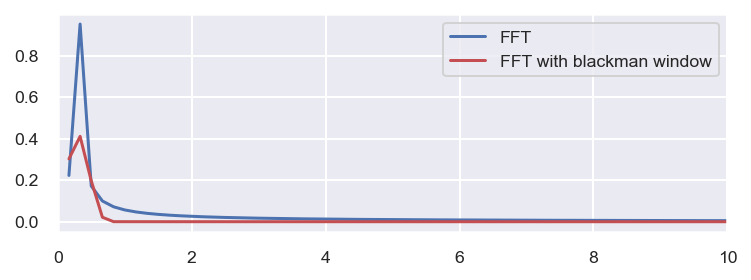

In [36]:
# Understand windowing
from scipy.signal import blackman

# Number of sample points
N = 600
# sample spacing
T = 0.01

w = blackman(N)
x = np.linspace(0.0, N*T, N, endpoint=False)
y = 1*np.sin(0.3 * 2.0 * np.pi * x + 0.008)# + 0.5*np.sin(0.6 * 2.0*np.pi*x)
yf = fft(y)
plt.plot(x, y, label='signal')
plt.plot(x, w, label='signal')
plt.show()


ywf = fft(y*w)
xf = fftfreq(N, T)[:N//2]
_, ax = plt.subplots(1, 1, figsize=(6, 2))
ax.plot(xf[1:N//2], 2.0/N * np.abs(yf[1:N//2]), '-b', label='FFT')
ax.plot(xf[1:N//2], 2.0/N * np.abs(ywf[1:N//2]), '-r', label='FFT with blackman window')
ax.set(xlim=(0, 10))
plt.legend()
